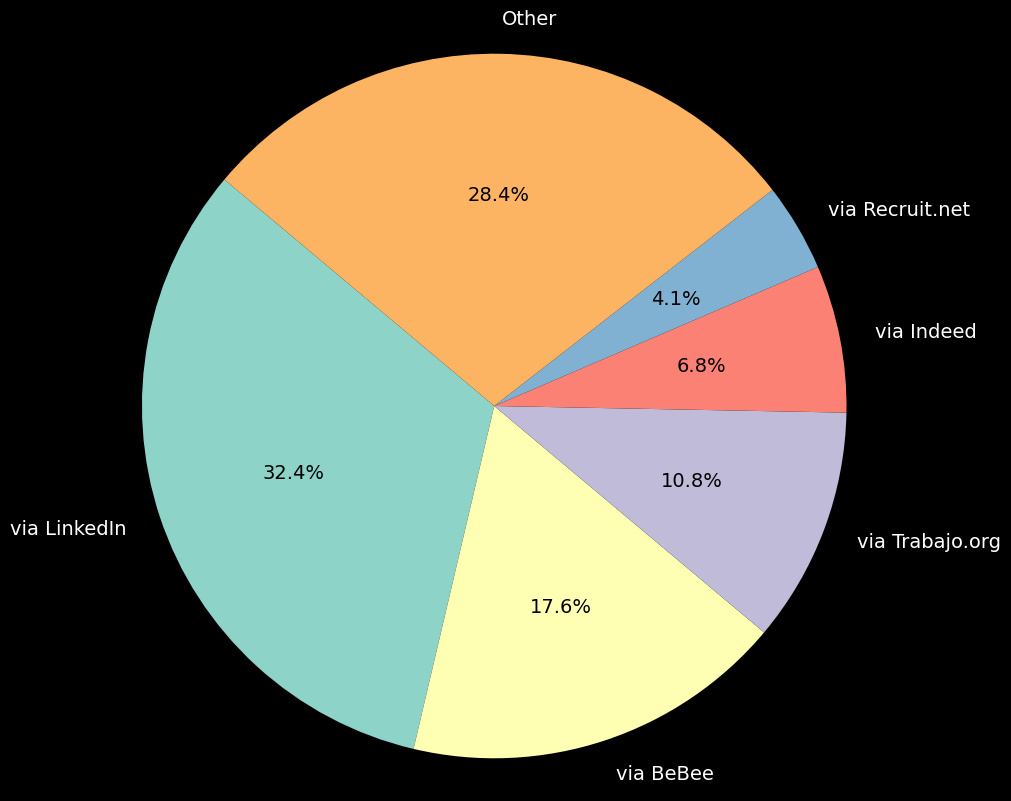

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame using a relative file path
csv_file_path = 'csv_output/0_job_via.csv'
df = pd.read_csv(csv_file_path)

# Convert the job_percentage column to numeric values (removing the '%' sign)
df['job_percentage'] = df['job_percentage'].str.rstrip('%').astype(float)

# Sort the DataFrame by job_percentage in descending order
df = df.sort_values(by='job_percentage', ascending=False)

# Separate the top 5 job sources and group the rest into "Other"
top_5 = df.iloc[:5]
other = df.iloc[5:].sum(numeric_only=True)
other['job_via'] = 'Other'
top_5 = pd.concat([top_5, pd.DataFrame([other])], ignore_index=True)

# Set the dark theme
plt.style.use('dark_background')

# Plot a pie chart with larger text for readability and legends inside the pie
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(top_5['job_percentage'], labels=top_5['job_via'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})

# Customize the text and autotext
for text in texts:
    text.set_fontsize(14)
    text.set_color('white')
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('black')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
